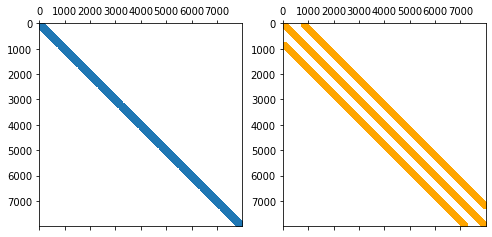

In [16]:
# by Saeed Shaker

# This code easily creates the sparse matrices using the corresponding switch vectors, 
# It does so regardless of the problem's dimension.
# See the example below for clarification.

import numpy as np
import scipy.sparse as sparse
import matplotlib.pyplot as plt

def SprsMaker4(X, Y, Z, dim):
    dimsAll = Z.shape # All dimensions
    dimMult = np.prod(dimsAll) # All dimensions multiplied
    dimMultLess = np.prod(dimsAll[0:dim-1]) # All dimensions before dim multiplied
    dimMultLess = dimMultLess.astype(np.int) #sometimes becomes float - should be integer
    dimeln = dimsAll[dim-1] # number of elements in the dimension of interest
    
    X_st = X.ravel()
    Y_st = Y.ravel()
    Z_st = Z.ravel()

    lowdiag = []
    centdiag = np.zeros(dimMult)
    updiag = np.zeros(dimMultLess)
    
    indicat_1 = np.zeros(dimMult);   # this indicator finds the elements for which the dimension of interest is 1
    indicat_end = np.zeros(dimMult); # this indicator finds the elements for which the dimension of interest is end
    for i01 in range(0 , dimMult , dimMultLess*dimeln):
        indicat_1[i01:i01+dimMultLess] = 1
    for i01 in range(dimMultLess*(dimeln-1) , dimMult , dimMultLess*dimeln):
        indicat_end[i01:i01+dimMultLess] = 1
        
    Y_st = Y_st + indicat_1*X_st
    X_st = X_st*(1 - indicat_1)
    
    Y_st = Y_st + indicat_end*Z_st
    Z_st = Z_st*(1 - indicat_end)
    
    lowdiag=np.append(lowdiag,X_st)
    centdiag = Y_st
    updiag=np.append(updiag,Z_st)
    
    lowdiag = lowdiag[dimMultLess:len(lowdiag)]
    
    SpMAT = sparse.spdiags(
        centdiag,0,dimMult,dimMult) + sparse.spdiags(
        updiag,dimMultLess,dimMult,dimMult) + sparse.spdiags(
        lowdiag,-dimMultLess,dimMult,dimMult)
    
    return SpMAT

#----------------------------------------------------------

# Example: testing SparseMaker
# If you have N dimensions, you need to make sure to specify which variable belongs to which dimension
# For example let's assume we have three states: a, z, q in the dimensions 1, 2 and 3 respectively.
# For any state variable, you need to expand the vectors (yy, chi, zeta) along the other dimensions
# Let the number of gridpoints be nA, nZ, nQ for a, z, q respectively.
# So for state variable a: expand it across the 2nd and 3rd dimensions of length nZ and nQ respectively.
# Do the same for any state of interest, but make sure to keep the state variable in it's current dimension.

# Let 
nA=40; nZ=20; nQ=10

# Matrix Bswitch (similar to Benjamin Moll's codes) - making random vectors
yy_z = np.random.rand(nZ)
chi_z =  np.random.rand(nZ)
zeta_z = np.random.rand(nZ)

yy_q = np.random.rand(nQ)
chi_q =  np.random.rand(nQ)
zeta_q = np.random.rand(nQ)

#Expanding across other dimensions: Keeping the states in their dimension
XX_z = np.tile(chi_z,(nA,nQ,1));  XX_z = np.moveaxis(XX_z, -1 , 1)
YY_z = np.tile(yy_z,(nA,nQ,1));   YY_z = np.moveaxis(YY_z, -1 , 1)
ZZ_z = np.tile(zeta_z,(nA,nQ,1)); ZZ_z = np.moveaxis(ZZ_z, -1 , 1)

XX_q = np.tile(chi_q,(nA,nZ,1));
YY_q = np.tile(yy_q,(nA,nZ,1));
ZZ_q = np.tile(zeta_q,(nA,nZ,1));

Bswitch_z = SprsMaker4(XX_z,YY_z,ZZ_z,2) #z is dimension 2
Bswitch_q = SprsMaker4(XX_q,YY_q,ZZ_q,3) #q is dimension 3
#Bswitch_e = SprsMaker4(XX_e,YY_e,ZZ_e,4) #e is dimension 4

# plot

fig, ax = plt.subplots(nrows=1, ncols=2 , figsize=(8,5))
ax[0].spy(Bswitch_z, markersize = 4 ,)
ax[1].spy(Bswitch_q, markersize = 4 , color = 'orange')